Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "James Shen"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
# Question 1. (4 points)

#  Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column.
#
df['Type of Cereal'] = df['name']
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,100% Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,100% Natural Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,All-Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,All-Bran with Extra Fiber
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Almond Delight


In [5]:
#  Write a function to replace the names of the cereal in your new column with one of these 
#  categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). 
#  Hint: the function should look through the text in the cereal name and determine, based on 
#  its contents, how to categorize the cereal type.

#  Clean data first: 'Fibre' should be standardized to 'Fiber'
#
df['Type of Cereal'] = df['Type of Cereal'].str.replace('Fibre', 'Fiber', regex=True)
#df.to_csv('cereal2.csv')

In [6]:
#  Comments: Since the text in the cereal name sometimes has multiple categories as suggested, 
#            the regular expression only replace the first category that it finds. i.e. If a 
#            cereal name contains multiple categories, the first category that is found by the 
#            regular expression will be applied to the 'Type of Cereal' for that cereal name.
#
cereal_type_list = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice']

for cereal_type in cereal_type_list:
    df['Type of Cereal'] = df['Type of Cereal'].str.replace(r'.*'+cereal_type+'.*', 
                                                            cereal_type, regex=True)

df.loc[~df['Type of Cereal'].isin(cereal_type_list), 'Type of Cereal'] = 'Other'
df.head(9)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,Other
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Other
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,Other
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Bran


In [7]:
# Question 2. (2 points)

#  Find median value for each column with bad data (negative value) excluded
#  Identify the negative values in the data set and replace them with the median value 
#  for that column
#
Numerical_Column_List = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
                         'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

for Numerical_Column in Numerical_Column_List:
    Numerical_Column_Median = df.loc[df[Numerical_Column]>=0, Numerical_Column].median()
    #print(Numerical_Column_Median)
    df.loc[df[Numerical_Column]<0, Numerical_Column] = Numerical_Column_Median
    
df.head(9)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90,25,3,1.00,0.75,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,Other
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Other
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,Other
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Bran


In [8]:
# Question 3. (5 points)

#  Standardize the 'weight' column to 1. For this question, you will need to write a function 
#  to divide the remaining columns which contain nutritional information by the corresponding 
#  value in the weight column, and you will need to divide the value in the weight column 
#  by itself in order to get 1. For example, if an observation has a weight value of 1.33 and 
#  a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and 
#  a weight value of 1.
#
#  Divisor 'weight' must be placed at the last
#
nutritional_list = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 
                    'potass', 'vitamins', 'cups', 'weight']

for nutritional in nutritional_list:
    df[nutritional] = df[nutritional] / df['weight']
    
df.head(9)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70.000000,4.000000,1.000000,130.000000,10.000000,5.000000,6.000000,280.00000,25.000000,3,1.0,0.33000,68.402973,Bran
1,100% Natural Bran,Q,C,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.00000,0.000000,3,1.0,1.00000,33.983679,Bran
2,All-Bran,K,C,70.000000,4.000000,1.000000,260.000000,9.000000,7.000000,5.000000,320.00000,25.000000,3,1.0,0.33000,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.000000,140.000000,14.000000,8.000000,0.000000,330.00000,25.000000,3,1.0,0.50000,93.704912,Bran
4,Almond Delight,R,C,110.000000,2.000000,2.000000,200.000000,1.000000,14.000000,8.000000,90.00000,25.000000,3,1.0,0.75000,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110.000000,2.000000,2.000000,180.000000,1.500000,10.500000,10.000000,70.00000,25.000000,1,1.0,0.75000,29.509541,Other
6,Apple Jacks,K,C,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.00000,25.000000,2,1.0,1.00000,33.174094,Other
7,Basic 4,G,C,97.744361,2.255639,1.503759,157.894737,1.503759,13.533835,6.015038,75.18797,18.796992,3,1.0,0.56391,37.038562,Other
8,Bran Chex,R,C,90.000000,2.000000,1.000000,200.000000,4.000000,15.000000,6.000000,125.00000,25.000000,1,1.0,0.67000,49.120253,Bran


In [9]:
# Question 4. (5 points)

#  Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. 
#  You can define your own version of healthy vs. unhealthy, or you can use the 
#  following: healthy cereals can be defined as those which have low calories 
#  (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). 
#  All other cereals are unhealthy.
#
df['healthy vs unhealthy'] = 'unhealthy'

df.loc[(df['calories']<100) & \
       (df['sodium']<150) & \
       (df['sugars']<9) & \
       (df['fiber']>3) & \
       (df['protein']>2), 
       'healthy vs unhealthy' ] = 'healthy'

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,healthy vs unhealthy
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,unhealthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,healthy
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0,3,1.0,0.75,34.384843,Other,unhealthy


In [10]:
# Question 5. (2 points)

#  Based on your newly prepared data set, identify what % of cereals that each manufacturer 
#  produces are healthy.

#  Number of cereals that each manufacturer produces are healthy
#
df_healthy = df.loc[ df['healthy vs unhealthy'] == 'healthy', ['mfr', 'healthy vs unhealthy'] ]
#print(df_healthy)
df_healthy_mfr_cnt = df_healthy.groupby('mfr').count()

#  Total number of cereals that each manufacturer produces
#
df_total = df[ ['mfr', 'healthy vs unhealthy'] ]
df_mfr_cnt = df_total.groupby('mfr').count()

#  Identify total cereal counts and healthy cereal counts for each manufacturer
#
df_mfc_compare = df_mfr_cnt.join(df_healthy_mfr_cnt, on='mfr', how='left', 
                                 lsuffix='.total_cnt', rsuffix='.healthy_cnt')

#  Give shorter column name
#
df_mfc_compare = df_mfc_compare.rename(columns={'healthy vs unhealthy.total_cnt':'total_cnt', 
                                                'healthy vs unhealthy.healthy_cnt':'healthy_cnt'})

#  For those manufacturer that does not have healthy cereal (i.e. NaN), 
#  set their healthy cereal counts to 0
#
df_mfc_compare = df_mfc_compare.fillna(0)

#  Identify what % of cereals that each manufacturer produces are healthy
#
df_mfc_compare['Cereals are healthy (%)'] = round(100 * df_mfc_compare['healthy_cnt'] / 
                                                  df_mfc_compare['total_cnt'], 2)
df_mfc_compare.index.names = ['For each manufacturer']
df_mfc_compare[['Cereals are healthy (%)']]

,Cereals are healthy (%)
For each manufacturer,
A,0.00
G,0.00
K,4.35
N,50.00
P,11.11
Q,0.00
R,0.00


In [11]:
# Question 6. (2 points)

#  Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.
#
healthy_unhealthy_rating = {}                             # define empty dictionary        
healthy_unhealthy_rating['Healthy cereals'] = []          # define empty list
healthy_unhealthy_rating['Unhealthy cereals'] = []        # define empty list

healthy_unhealthy_rating['Healthy cereals'].append(
    df.loc[ df['healthy vs unhealthy'] == 'healthy', 'rating' ].mean())
healthy_unhealthy_rating['Healthy cereals'].append(
    df.loc[ df['healthy vs unhealthy'] == 'healthy', 'rating' ].min())
healthy_unhealthy_rating['Healthy cereals'].append(
    df.loc[ df['healthy vs unhealthy'] == 'healthy', 'rating' ].max())

healthy_unhealthy_rating['Unhealthy cereals'].append(
    df.loc[ df['healthy vs unhealthy'] == 'unhealthy', 'rating' ].mean())
healthy_unhealthy_rating['Unhealthy cereals'].append(
    df.loc[ df['healthy vs unhealthy'] == 'unhealthy', 'rating' ].min())
healthy_unhealthy_rating['Unhealthy cereals'].append(
    df.loc[ df['healthy vs unhealthy'] == 'unhealthy', 'rating' ].max())

healthy_unhealthy_rating = pd.DataFrame(
    healthy_unhealthy_rating, index=['Average ratings', 'Minimum ratings', 'Maximum ratings'])

healthy_unhealthy_rating

,Healthy cereals,Unhealthy cereals
Average ratings,69.146753,40.826743
Minimum ratings,40.917047,18.042851
Maximum ratings,93.704912,72.801787


In [12]:
#  Use DataFrame groupby operation and aggregate function is much simpler
#
healthy_unhealthy_rating = df.groupby('healthy vs unhealthy')['rating'].agg(
    [('Average ratings','mean'),('Minimum ratings','min'),('Maximum ratings','max')])

healthy_unhealthy_rating

,Average ratings,Minimum ratings,Maximum ratings
healthy vs unhealthy,,,
healthy,69.146753,40.917047,93.704912
unhealthy,40.826743,18.042851,72.801787


In [13]:
#  Can potentially aggregate attributes other than 'rating'
#
healthy_unhealthy_rating = df.groupby('healthy vs unhealthy').agg(
    {'rating': [('Average ratings','mean'),('Minimum ratings','min'),('Maximum ratings','max')]})

healthy_unhealthy_rating

rating                                
                     Average ratings Minimum ratings Maximum ratings
healthy vs unhealthy                                                
healthy                    69.146753       40.917047       93.704912
unhealthy                  40.826743       18.042851       72.801787

In [14]:
# Question 7. (2 points)

#  Calculate the average, minimum and maximum ratings for each type of cereal: 
#  Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.
#
cereal_type_list.append('Other')
cereal_type_rating = {}

for cereal_type in cereal_type_list:
    cereal_type_rating[cereal_type] = []
    cereal_type_rating[cereal_type].append(df.loc[ df['Type of Cereal'] == cereal_type, 'rating' ].mean())
    cereal_type_rating[cereal_type].append(df.loc[ df['Type of Cereal'] == cereal_type, 'rating' ].min())
    cereal_type_rating[cereal_type].append(df.loc[ df['Type of Cereal'] == cereal_type, 'rating' ].max())

cereal_type_rating = pd.DataFrame(cereal_type_rating, 
                                  index=['Average ratings', 'Minimum ratings', 'Maximum ratings'])
cereal_type_rating

,Bran,Wheat,Fiber,Protein,Crunch,Corn,Nut,Rice,Other
Average ratings,50.714179,56.333863,40.917047,NaN,26.078598,40.482720,42.736791,47.771735,37.281694
Minimum ratings,28.592785,36.176196,40.917047,NaN,18.042851,35.782791,31.072217,40.560159,21.871292
Maximum ratings,93.704912,72.801787,40.917047,NaN,36.523683,45.863324,53.371007,60.756112,55.333142


In [15]:
#  Use DataFrame groupby operation and aggregate function is much simpler
#
cereal_type_rating = df.groupby('Type of Cereal')['rating'].agg(
    [('Average ratings','mean'),('Minimum ratings','min'),('Maximum ratings','max')])

cereal_type_rating

,Average ratings,Minimum ratings,Maximum ratings
Type of Cereal,,,
Bran,50.714179,28.592785,93.704912
Corn,40.482720,35.782791,45.863324
Crunch,26.078598,18.042851,36.523683
Fiber,40.917047,40.917047,40.917047
Nut,42.736791,31.072217,53.371007
Other,37.281694,21.871292,55.333142
Rice,47.771735,40.560159,60.756112
Wheat,56.333863,36.176196,72.801787


In [16]:
# Question 8. (3 points)

#  Create a stacked bar chart which shows how many of each type of cereal each manufacturer 
#  produces.

#  First step is to count the number of names for each type of cereal that each manufacturer 
#  produces.
#
df_mfr_type_cnt = df.pivot_table(index='mfr', columns='Type of Cereal', values='name', 
                                 aggfunc='count')
df_mfr_type_cnt

Type of Cereal,Bran,Corn,Crunch,Fiber,Nut,Other,Rice,Wheat
mfr,,,,,,,,
A,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
G,2.0,1.0,1.0,NaN,1.0,14.0,NaN,3.0
K,5.0,2.0,2.0,NaN,2.0,9.0,1.0,2.0
N,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
P,2.0,NaN,NaN,1.0,2.0,4.0,NaN,NaN
Q,1.0,NaN,1.0,NaN,NaN,4.0,1.0,1.0
R,1.0,1.0,NaN,NaN,NaN,4.0,1.0,1.0


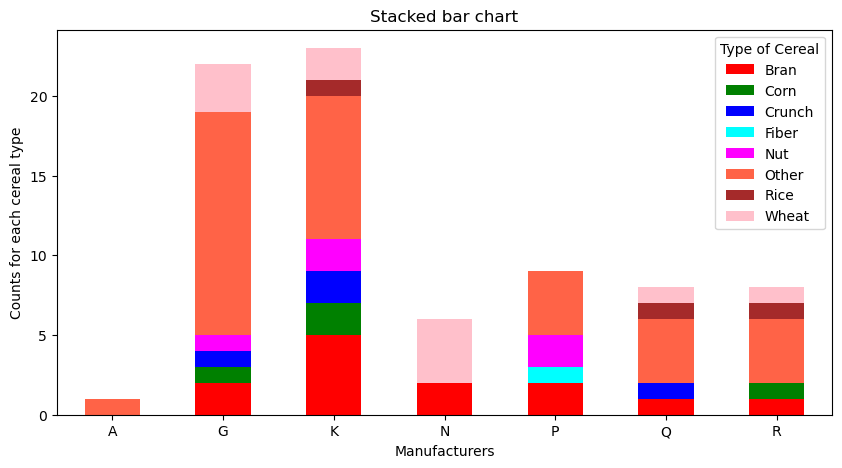

In [17]:
#  Next step is to create a stacked bar chart to plot the above counts
#
fig, ax = plt.subplots(figsize = [10,5]);

df_mfr_type_cnt.plot(ax=ax, kind = 'bar', stacked=True, 
    color = ['red', 'green', 'blue', 'cyan', 'magenta', 'tomato', 'brown', 'pink']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_xlabel('Manufacturers');
ax.set_ylabel('Counts for each cereal type');
ax.set_title('Stacked bar chart');

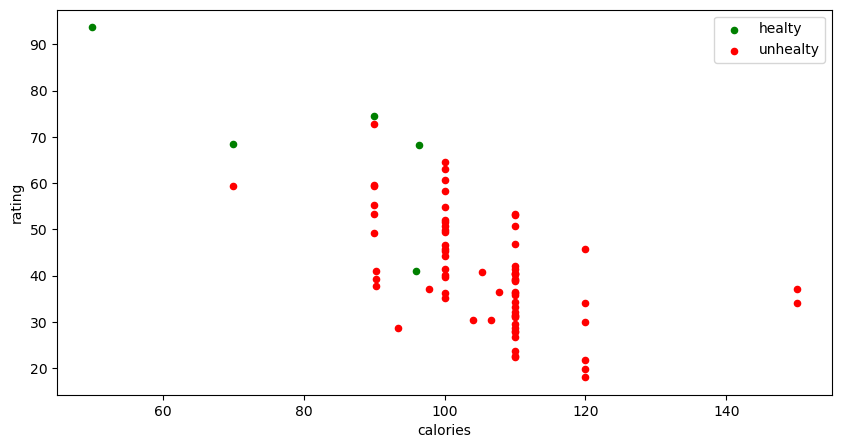

In [18]:
# Question 9. (3 points)

#  Create a 3-dimensional scatterplot which shows the relationship between rating and calories; 
#  the 3-rd dimension should be reflected in the color of the dots and should highlight whether 
#  the cereal is categorized as healthy or unhealthy.
#
fig, ax = plt.subplots(figsize = [10,5]);

df[df['healthy vs unhealthy']=='healthy'].plot(ax=ax, kind='scatter', label='healty', 
                                               x='calories', y='rating', c='g');

df[df['healthy vs unhealthy']=='unhealthy'].plot(ax=ax, kind='scatter', label='unhealty', 
                                                 x='calories', y='rating', c='r');

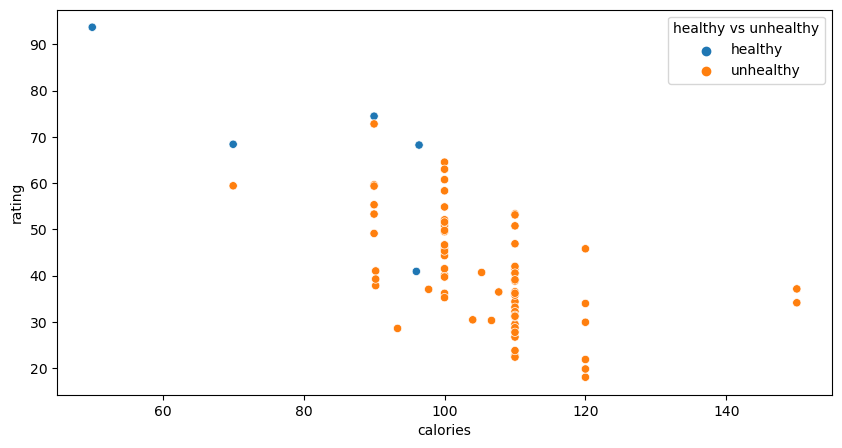

In [19]:
#  Using seaborn library make scatterplot easier
#
fig, ax = plt.subplots(figsize = [10,5]);
sns.scatterplot(df, ax=ax, x='calories', y='rating', hue='healthy vs unhealthy');

In [20]:
# Question 10. (1 point)

#  Which shelf has the most healthy cereals?

#  First step is to count the number of healthy cereals that are hold by each shelf.
#
df_shelf_healthy_cnt = df.pivot_table(index='shelf', columns='healthy vs unhealthy', 
                                      values='name', aggfunc='count')
df_shelf_healthy_cnt

healthy vs unhealthy,healthy,unhealthy
shelf,,
1,2.0,18.0
2,NaN,21.0
3,3.0,33.0


**Which shelf has the most healthy cereals?**

The table above shows me that shelf 3 has the most healthy cereals.

In [21]:
# Question 11. (1 point)

#  Based on the analysis conducted, what can you conclude about the cereal data set?

**Based on the analysis conducted, what can you conclude about the cereal data set?**

Based on the analysis conducted, we can conclude that:
1. Most of cereals in the cereal data set are unhealthy
2. All cereals on shelf 2 are unhealthy
3. No manufacturer produce type of cereal that can be categorized as protein